In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("mall.csv")

In [5]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [7]:
df=df.drop(columns=['CustomerID','Genre'])

In [9]:
df.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81


In [11]:
x=df.iloc[:, [0,1]].values

In [13]:
from sklearn.cluster import KMeans

In [15]:
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

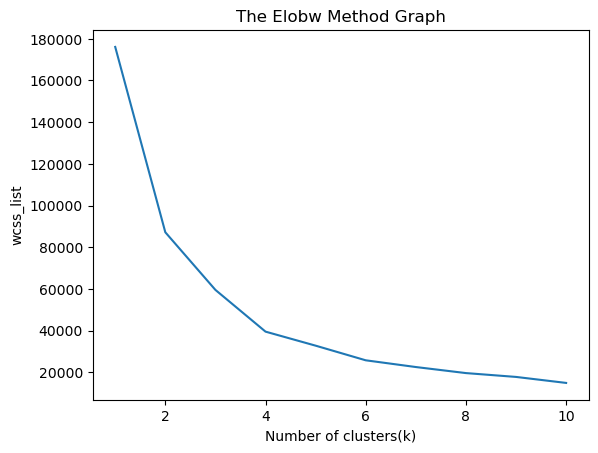

In [17]:
a=[]

for i in range(1,11):
    b=KMeans(n_clusters=i ,init='k-means++' ,random_state=42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11),a)

plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

From the above plot,we can see the elbow point is at 4.
so the number of clusters here will be 4

In [20]:
b=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_predict=b.fit_predict(x)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


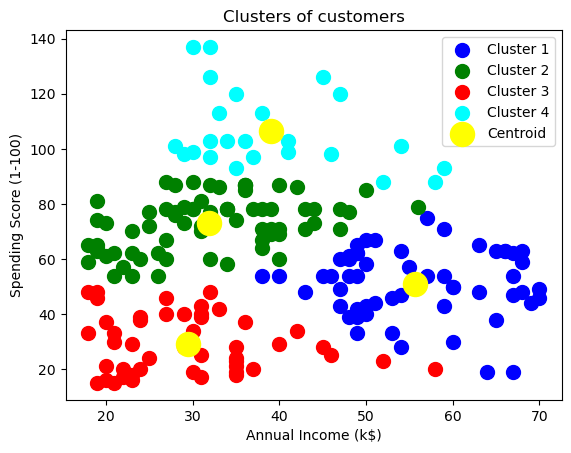

In [24]:
# Visualizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')#for the cluster1
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')#for the cluster2
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')#for the cluster3
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')#for the cluster4

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow',
            label = 'Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()